__영상을 입력해서 수치를 예측하는 모델 (다층 퍼셉트론 및 컨볼루션 신경망 모델 구성 및 학습)__
이 모델은 고정된 지역에서 촬영된 영상으로부터 복잡도, 밀도 등을 수치화하는 문제 풀 수 있음

### 1. 데이터셋 준비
너비와 높이가 16이고, 픽셀값이 0또는 1을 가지는 영상 만들기

In [18]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
width = 16
height = 16

In [15]:
def generate_dataset(samples):
    
    ds_x = []  # 이미지
    ds_y = []  # 라벨값
    
    for it in range(samples):
        num_pt = np.random.randint(0, width * height)  # 0 ~ 256 사이의 정수(라벨값)
        img = generate_image(num_pt)  # 라벨값을 넣어 image를 만듦 (픽셀이 1인 값의 개수가 라벨값)
        
        ds_y.append(num_pt)
        ds_x.append(img)
        
    return np.array(ds_x), np.array(ds_y).reshape(samples, 1)

def generate_image(points):
    
    img = np.zeros((width, height))
    pts = np.random.random((points, 2))  # 픽셀값을 1로 넣을 좌표
    
    for ipt in pts:
        img[int(ipt[0] * width), int(ipt[1] * height)] = 1
        
    return img.reshape(width, height, 1)

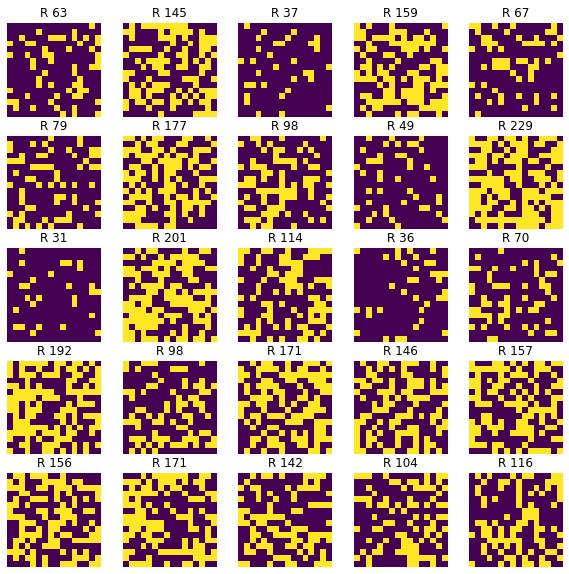

In [20]:
# 데이터 확인

plt_row = 5
plt_col = 5

plt.rcParams['figure.figsize'] = (10, 10)  # plt.figure(figsize=(10, 10))과 동일
                  # plf.figure은 그릴 때 마다 지정해야하지만, 이건 기본값 설정
f, axarr = plt.subplots(plt_row, plt_col)

for i in range(plt_row * plt_col):
    sub_plt = axarr[i//plt_row, i%plt_col]
    sub_plt.axis('off')   # 축 제거
    sub_plt.imshow(x_train[i].reshape(width, height))
    sub_plt.set_title('R ' + str(y_train[i][0]))  # 픽셀이 1인 값의 개수

plt.show()

### 2. 레이어 준비
- 2D input data
- Conv2D
- MaxPooling2D
- Flatten
- relu

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
%matplotlib inline

#### 1) 다층 퍼셉트론 신경망 모델

In [27]:
x_train.shape

(1500, 16, 16, 1)

In [28]:
# 데이터 1차원으로 reshape 해주기

x_train_1d = x_train.reshape(x_train.shape[0], width*height)
x_val_1d = x_val.reshape(x_val.shape[0], width*height)
x_test_1d = x_test.reshape(x_test.shape[0], width*height)

In [29]:
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=width*height))
model.add(Dense(256, activation='relu'))
model.add(Dense(256))
model.add(Dense(1))

In [30]:
model.compile(loss='mse', optimizer='adam')

In [31]:
hist = model.fit(x_train_1d, y_train, batch_size=32, epochs=1000, 
                 validation_data=(x_val_1d, y_val))

Epoch 1/1000
47/47 [==============================] - 0s 6ms/step - loss: 4910.1118 - val_loss: 343.2584
Epoch 2/1000
47/47 [==============================] - 0s 3ms/step - loss: 254.1896 - val_loss: 198.8405
Epoch 3/1000
47/47 [==============================] - 0s 3ms/step - loss: 207.8898 - val_loss: 161.9005
Epoch 4/1000
47/47 [==============================] - 0s 3ms/step - loss: 144.1572 - val_loss: 117.1132
Epoch 5/1000
47/47 [==============================] - 0s 3ms/step - loss: 103.0044 - val_loss: 108.0643
Epoch 6/1000
47/47 [==============================] - 0s 3ms/step - loss: 84.4086 - val_loss: 96.6499
Epoch 7/1000
47/47 [==============================] - 0s 3ms/step - loss: 60.8625 - val_loss: 89.6707
Epoch 8/1000
47/47 [==============================] - 0s 3ms/step - loss: 45.0873 - val_loss: 86.8468
Epoch 9/1000
47/47 [==============================] - 0s 3ms/step - loss: 31.5310 - val_loss: 83.0815
Epoch 10/1000
47/47 [==============================] - 0s 4ms/step - lo

47/47 [==============================] - 0s 3ms/step - loss: 3.6199 - val_loss: 81.4202
Epoch 82/1000
47/47 [==============================] - 0s 3ms/step - loss: 3.7305 - val_loss: 78.0102
Epoch 83/1000
47/47 [==============================] - 0s 3ms/step - loss: 6.6201 - val_loss: 88.9489
Epoch 84/1000
47/47 [==============================] - 0s 3ms/step - loss: 4.7008 - val_loss: 81.2894
Epoch 85/1000
47/47 [==============================] - 0s 3ms/step - loss: 2.4588 - val_loss: 82.2383
Epoch 86/1000
47/47 [==============================] - 0s 3ms/step - loss: 1.3518 - val_loss: 76.8092
Epoch 87/1000
47/47 [==============================] - 0s 3ms/step - loss: 0.9735 - val_loss: 76.8760
Epoch 88/1000
47/47 [==============================] - 0s 3ms/step - loss: 0.8971 - val_loss: 76.1504
Epoch 89/1000
47/47 [==============================] - 0s 3ms/step - loss: 1.0030 - val_loss: 76.0914
Epoch 90/1000
47/47 [==============================] - 0s 3ms/step - loss: 1.9178 - val_loss: 77

Epoch 161/1000
47/47 [==============================] - 0s 3ms/step - loss: 0.6754 - val_loss: 77.9434
Epoch 162/1000
47/47 [==============================] - 0s 3ms/step - loss: 0.4713 - val_loss: 76.4357
Epoch 163/1000
47/47 [==============================] - 0s 3ms/step - loss: 0.7060 - val_loss: 80.1724
Epoch 164/1000
47/47 [==============================] - 0s 3ms/step - loss: 1.0305 - val_loss: 76.5868
Epoch 165/1000
47/47 [==============================] - 0s 3ms/step - loss: 5.0236 - val_loss: 85.1318
Epoch 166/1000
47/47 [==============================] - 0s 4ms/step - loss: 12.5437 - val_loss: 84.9133
Epoch 167/1000
47/47 [==============================] - 0s 3ms/step - loss: 6.7370 - val_loss: 82.8762
Epoch 168/1000
47/47 [==============================] - 0s 4ms/step - loss: 4.3690 - val_loss: 84.4042
Epoch 169/1000
47/47 [==============================] - 0s 4ms/step - loss: 5.8575 - val_loss: 77.4652
Epoch 170/1000
47/47 [==============================] - 0s 4ms/step - lo

47/47 [==============================] - 0s 5ms/step - loss: 0.1761 - val_loss: 75.7537
Epoch 241/1000
47/47 [==============================] - 0s 5ms/step - loss: 0.1803 - val_loss: 76.4377
Epoch 242/1000
47/47 [==============================] - 0s 5ms/step - loss: 0.1850 - val_loss: 76.9105
Epoch 243/1000
47/47 [==============================] - 0s 5ms/step - loss: 0.1163 - val_loss: 75.7621
Epoch 244/1000
47/47 [==============================] - 0s 5ms/step - loss: 0.1394 - val_loss: 76.7894
Epoch 245/1000
47/47 [==============================] - 0s 5ms/step - loss: 0.1472 - val_loss: 75.6249
Epoch 246/1000
47/47 [==============================] - 0s 5ms/step - loss: 0.1761 - val_loss: 77.2663
Epoch 247/1000
47/47 [==============================] - 0s 5ms/step - loss: 0.0984 - val_loss: 76.5998
Epoch 248/1000
47/47 [==============================] - 0s 5ms/step - loss: 0.0541 - val_loss: 76.2562
Epoch 249/1000
47/47 [==============================] - 0s 6ms/step - loss: 0.0371 - val

47/47 [==============================] - 0s 5ms/step - loss: 0.5832 - val_loss: 76.9778
Epoch 320/1000
47/47 [==============================] - 0s 6ms/step - loss: 1.0234 - val_loss: 76.2600
Epoch 321/1000
47/47 [==============================] - 0s 6ms/step - loss: 1.2819 - val_loss: 79.5748
Epoch 322/1000
47/47 [==============================] - 0s 5ms/step - loss: 0.8121 - val_loss: 84.8889
Epoch 323/1000
47/47 [==============================] - 0s 5ms/step - loss: 0.8295 - val_loss: 79.5962
Epoch 324/1000
47/47 [==============================] - 0s 4ms/step - loss: 1.3962 - val_loss: 78.9792
Epoch 325/1000
47/47 [==============================] - ETA: 0s - loss: 1.844 - 0s 5ms/step - loss: 1.7498 - val_loss: 77.1308
Epoch 326/1000
47/47 [==============================] - 0s 5ms/step - loss: 3.3222 - val_loss: 89.3299
Epoch 327/1000
47/47 [==============================] - 0s 5ms/step - loss: 4.7801 - val_loss: 80.3095
Epoch 328/1000
47/47 [==============================] - 0s 5ms/s

47/47 [==============================] - 0s 5ms/step - loss: 2.4536 - val_loss: 76.5050
Epoch 399/1000
47/47 [==============================] - 0s 5ms/step - loss: 3.0649 - val_loss: 75.7849
Epoch 400/1000
47/47 [==============================] - 0s 5ms/step - loss: 1.3496 - val_loss: 80.1050
Epoch 401/1000
47/47 [==============================] - 0s 5ms/step - loss: 1.0941 - val_loss: 80.7891
Epoch 402/1000
47/47 [==============================] - 0s 5ms/step - loss: 0.5157 - val_loss: 78.8302
Epoch 403/1000
47/47 [==============================] - 0s 6ms/step - loss: 0.3448 - val_loss: 80.4665
Epoch 404/1000
47/47 [==============================] - 0s 5ms/step - loss: 0.4367 - val_loss: 78.7285
Epoch 405/1000
47/47 [==============================] - 0s 6ms/step - loss: 0.2422 - val_loss: 77.9118
Epoch 406/1000
47/47 [==============================] - 0s 5ms/step - loss: 0.1025 - val_loss: 77.7605
Epoch 407/1000
47/47 [==============================] - 0s 6ms/step - loss: 0.0622 - val

47/47 [==============================] - 0s 4ms/step - loss: 0.5454 - val_loss: 75.0812
Epoch 478/1000
47/47 [==============================] - 0s 4ms/step - loss: 0.6204 - val_loss: 79.8957
Epoch 479/1000
47/47 [==============================] - 0s 4ms/step - loss: 0.8137 - val_loss: 75.5269
Epoch 480/1000
47/47 [==============================] - 0s 4ms/step - loss: 0.9483 - val_loss: 76.3037
Epoch 481/1000
47/47 [==============================] - 0s 4ms/step - loss: 0.5055 - val_loss: 76.1781
Epoch 482/1000
47/47 [==============================] - 0s 4ms/step - loss: 0.4346 - val_loss: 77.6050
Epoch 483/1000
47/47 [==============================] - 0s 4ms/step - loss: 0.4208 - val_loss: 75.9583
Epoch 484/1000
47/47 [==============================] - 0s 5ms/step - loss: 0.3327 - val_loss: 76.4179
Epoch 485/1000
47/47 [==============================] - 0s 5ms/step - loss: 0.2508 - val_loss: 78.3968
Epoch 486/1000
47/47 [==============================] - 0s 5ms/step - loss: 0.1863 - val

47/47 [==============================] - 0s 4ms/step - loss: 0.3742 - val_loss: 80.0415
Epoch 557/1000
47/47 [==============================] - 0s 4ms/step - loss: 0.2332 - val_loss: 76.6233
Epoch 558/1000
47/47 [==============================] - 0s 4ms/step - loss: 0.4311 - val_loss: 75.3758
Epoch 559/1000
47/47 [==============================] - 0s 4ms/step - loss: 0.8927 - val_loss: 74.8656
Epoch 560/1000
47/47 [==============================] - 0s 4ms/step - loss: 0.6925 - val_loss: 78.6528
Epoch 561/1000
47/47 [==============================] - 0s 4ms/step - loss: 1.5891 - val_loss: 77.7594
Epoch 562/1000
47/47 [==============================] - 0s 4ms/step - loss: 1.9466 - val_loss: 75.0791
Epoch 563/1000
47/47 [==============================] - 0s 4ms/step - loss: 1.1058 - val_loss: 76.7616
Epoch 564/1000
47/47 [==============================] - 0s 4ms/step - loss: 2.4197 - val_loss: 76.1659
Epoch 565/1000
47/47 [==============================] - 0s 4ms/step - loss: 1.6137 - val

47/47 [==============================] - 0s 5ms/step - loss: 0.8949 - val_loss: 78.8585
Epoch 636/1000
47/47 [==============================] - 0s 4ms/step - loss: 1.0879 - val_loss: 80.1103
Epoch 637/1000
47/47 [==============================] - 0s 5ms/step - loss: 1.1400 - val_loss: 78.8779
Epoch 638/1000
47/47 [==============================] - 0s 4ms/step - loss: 0.6556 - val_loss: 77.4796
Epoch 639/1000
47/47 [==============================] - 0s 4ms/step - loss: 0.4187 - val_loss: 76.0411
Epoch 640/1000
47/47 [==============================] - 0s 4ms/step - loss: 0.5674 - val_loss: 80.7672
Epoch 641/1000
47/47 [==============================] - 0s 4ms/step - loss: 0.8420 - val_loss: 80.9746
Epoch 642/1000
47/47 [==============================] - 0s 5ms/step - loss: 1.0391 - val_loss: 77.5891
Epoch 643/1000
47/47 [==============================] - 0s 4ms/step - loss: 0.8690 - val_loss: 78.8451
Epoch 644/1000
47/47 [==============================] - 0s 5ms/step - loss: 0.7000 - val

47/47 [==============================] - 0s 5ms/step - loss: 0.4897 - val_loss: 76.0859
Epoch 715/1000
47/47 [==============================] - 0s 5ms/step - loss: 0.6480 - val_loss: 76.5490
Epoch 716/1000
47/47 [==============================] - 0s 6ms/step - loss: 0.9164 - val_loss: 78.4501
Epoch 717/1000
47/47 [==============================] - 0s 5ms/step - loss: 0.7945 - val_loss: 76.9126
Epoch 718/1000
47/47 [==============================] - 0s 5ms/step - loss: 1.3082 - val_loss: 77.7760
Epoch 719/1000
47/47 [==============================] - 0s 6ms/step - loss: 1.7695 - val_loss: 85.6891
Epoch 720/1000
47/47 [==============================] - 0s 5ms/step - loss: 2.0250 - val_loss: 77.3133
Epoch 721/1000
47/47 [==============================] - 0s 5ms/step - loss: 2.4180 - val_loss: 81.7321
Epoch 722/1000
47/47 [==============================] - 0s 5ms/step - loss: 1.5172 - val_loss: 77.7717
Epoch 723/1000
47/47 [==============================] - 0s 5ms/step - loss: 0.6569 - val

47/47 [==============================] - 0s 4ms/step - loss: 0.8560 - val_loss: 77.5874
Epoch 794/1000
47/47 [==============================] - 0s 4ms/step - loss: 2.4776 - val_loss: 92.1537
Epoch 795/1000
47/47 [==============================] - 0s 4ms/step - loss: 4.1086 - val_loss: 77.9871
Epoch 796/1000
47/47 [==============================] - 0s 4ms/step - loss: 1.6637 - val_loss: 78.1238
Epoch 797/1000
47/47 [==============================] - 0s 4ms/step - loss: 1.2236 - val_loss: 78.2136
Epoch 798/1000
47/47 [==============================] - 0s 4ms/step - loss: 3.3478 - val_loss: 76.3334
Epoch 799/1000
47/47 [==============================] - 0s 5ms/step - loss: 3.8543 - val_loss: 82.3200
Epoch 800/1000
47/47 [==============================] - 0s 5ms/step - loss: 4.7788 - val_loss: 79.0099
Epoch 801/1000
47/47 [==============================] - 0s 4ms/step - loss: 2.2424 - val_loss: 75.8643
Epoch 802/1000
47/47 [==============================] - 0s 4ms/step - loss: 0.9866 - val

47/47 [==============================] - 0s 4ms/step - loss: 0.0443 - val_loss: 76.2308
Epoch 873/1000
47/47 [==============================] - 0s 4ms/step - loss: 0.0323 - val_loss: 76.6744
Epoch 874/1000
47/47 [==============================] - 0s 4ms/step - loss: 0.0186 - val_loss: 77.1439
Epoch 875/1000
47/47 [==============================] - 0s 4ms/step - loss: 0.0224 - val_loss: 76.4924
Epoch 876/1000
47/47 [==============================] - 0s 4ms/step - loss: 0.0197 - val_loss: 76.5654
Epoch 877/1000
47/47 [==============================] - 0s 4ms/step - loss: 0.0539 - val_loss: 77.2033
Epoch 878/1000
47/47 [==============================] - 0s 4ms/step - loss: 0.2388 - val_loss: 77.7309
Epoch 879/1000
47/47 [==============================] - 0s 4ms/step - loss: 0.2766 - val_loss: 77.7112
Epoch 880/1000
47/47 [==============================] - 0s 4ms/step - loss: 0.3902 - val_loss: 75.4412
Epoch 881/1000
47/47 [==============================] - 0s 5ms/step - loss: 0.3391 - val

47/47 [==============================] - 0s 5ms/step - loss: 0.7391 - val_loss: 75.9707
Epoch 952/1000
47/47 [==============================] - 0s 5ms/step - loss: 0.5781 - val_loss: 77.0355
Epoch 953/1000
47/47 [==============================] - 0s 5ms/step - loss: 0.9675 - val_loss: 73.7002
Epoch 954/1000
47/47 [==============================] - 0s 5ms/step - loss: 1.0966 - val_loss: 75.7483
Epoch 955/1000
47/47 [==============================] - 0s 5ms/step - loss: 0.4791 - val_loss: 75.0210
Epoch 956/1000
47/47 [==============================] - 0s 6ms/step - loss: 0.2755 - val_loss: 76.4379
Epoch 957/1000
47/47 [==============================] - 0s 5ms/step - loss: 0.3773 - val_loss: 76.1444
Epoch 958/1000
47/47 [==============================] - 0s 5ms/step - loss: 0.5694 - val_loss: 78.1415
Epoch 959/1000
47/47 [==============================] - 0s 6ms/step - loss: 0.4146 - val_loss: 74.8510
Epoch 960/1000
47/47 [==============================] - 0s 5ms/step - loss: 0.2411 - val

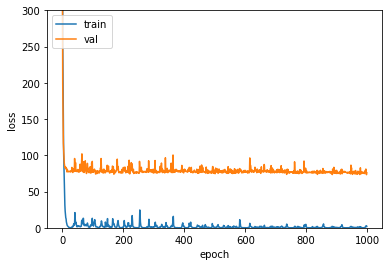

In [33]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.ylim(0.0, 300.0)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [34]:
# 모델 평가하기

score = model.evaluate(x_test_1d, y_test, batch_size=32)
print(score)

4/4 [==============================] - 0s 2ms/step - loss: 97.7211
97.72111511230469


In [37]:
# 모델 사용하기

yhat_test = model.predict(x_test_1d, batch_size=32)

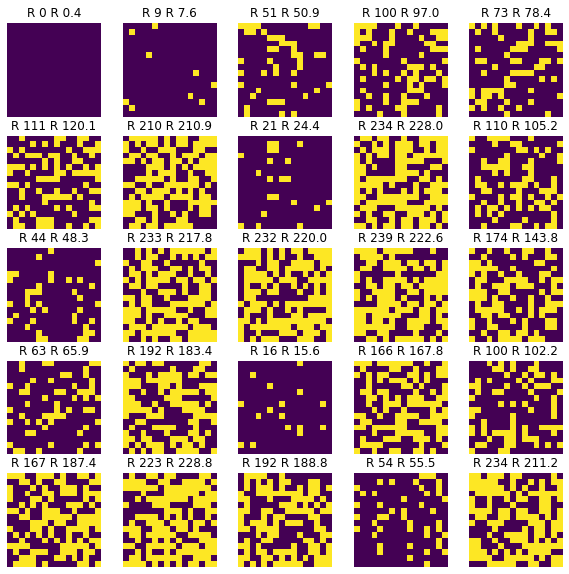

In [38]:
plt_row = 5
plt_col = 5

plt.rcParams['figure.figsize'] = (10, 10)
f, axarr = plt.subplots(plt_row, plt_col)

for i in range(plt_row * plt_col):
    sub_plt = axarr[i//plt_row, i%plt_col]
    sub_plt.axis('off')
    sub_plt.imshow(x_test[i].reshape(width, height))
    sub_plt.set_title('R %d R %.1f' %(y_test[i][0], yhat_test[i][0]))

plt.show()

#### 2) 컨볼루션 신경망 모델


In [39]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(width, height, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1))

In [40]:
model.compile(loss='mse', optimizer='adam')

In [41]:
hist = model.fit(x_train, y_train, batch_size=32, epochs=1000,
                validation_data=(x_val, y_val))

Epoch 1/1000
47/47 [==============================] - 0s 10ms/step - loss: 11965.9775 - val_loss: 1502.5726
Epoch 2/1000
47/47 [==============================] - 0s 9ms/step - loss: 1446.4357 - val_loss: 1079.7023
Epoch 3/1000
47/47 [==============================] - 0s 9ms/step - loss: 1011.6361 - val_loss: 713.2589
Epoch 4/1000
47/47 [==============================] - 0s 10ms/step - loss: 627.7506 - val_loss: 395.6927
Epoch 5/1000
47/47 [==============================] - 0s 10ms/step - loss: 373.7845 - val_loss: 267.5727
Epoch 6/1000
47/47 [==============================] - 1s 11ms/step - loss: 294.6353 - val_loss: 252.5001
Epoch 7/1000
47/47 [==============================] - 1s 11ms/step - loss: 286.9732 - val_loss: 246.1662
Epoch 8/1000
47/47 [==============================] - 1s 12ms/step - loss: 269.7232 - val_loss: 229.4280
Epoch 9/1000
47/47 [==============================] - 0s 10ms/step - loss: 256.6152 - val_loss: 210.1832
Epoch 10/1000
47/47 [==============================

47/47 [==============================] - 1s 11ms/step - loss: 113.6413 - val_loss: 161.1463
Epoch 79/1000
47/47 [==============================] - 1s 11ms/step - loss: 105.7284 - val_loss: 159.4081
Epoch 80/1000
47/47 [==============================] - 0s 10ms/step - loss: 101.7120 - val_loss: 160.0437
Epoch 81/1000
47/47 [==============================] - 0s 10ms/step - loss: 113.1520 - val_loss: 161.0403
Epoch 82/1000
47/47 [==============================] - 1s 13ms/step - loss: 114.2568 - val_loss: 197.9570
Epoch 83/1000
47/47 [==============================] - 1s 12ms/step - loss: 100.4571 - val_loss: 159.0512
Epoch 84/1000
47/47 [==============================] - 0s 11ms/step - loss: 100.6293 - val_loss: 161.6415
Epoch 85/1000
47/47 [==============================] - 1s 11ms/step - loss: 99.2570 - val_loss: 167.1846
Epoch 86/1000
47/47 [==============================] - 1s 12ms/step - loss: 98.6059 - val_loss: 162.8088
Epoch 87/1000
47/47 [==============================] - 1s 11ms

47/47 [==============================] - 0s 10ms/step - loss: 17.2115 - val_loss: 196.8025
Epoch 156/1000
47/47 [==============================] - 1s 11ms/step - loss: 15.6622 - val_loss: 204.3051
Epoch 157/1000
47/47 [==============================] - 0s 11ms/step - loss: 18.1932 - val_loss: 197.7433
Epoch 158/1000
47/47 [==============================] - 1s 11ms/step - loss: 14.3891 - val_loss: 204.1971
Epoch 159/1000
47/47 [==============================] - 0s 10ms/step - loss: 14.8854 - val_loss: 204.9752
Epoch 160/1000
47/47 [==============================] - 0s 10ms/step - loss: 15.1449 - val_loss: 203.2377
Epoch 161/1000
47/47 [==============================] - 0s 9ms/step - loss: 12.3578 - val_loss: 205.2728
Epoch 162/1000
47/47 [==============================] - 0s 10ms/step - loss: 12.8527 - val_loss: 202.6631
Epoch 163/1000
47/47 [==============================] - 1s 11ms/step - loss: 11.8905 - val_loss: 203.6442
Epoch 164/1000
47/47 [==============================] - 1s 11m

47/47 [==============================] - 0s 10ms/step - loss: 0.4071 - val_loss: 227.6691
Epoch 234/1000
47/47 [==============================] - 0s 10ms/step - loss: 0.5025 - val_loss: 227.8941
Epoch 235/1000
47/47 [==============================] - 0s 10ms/step - loss: 0.8807 - val_loss: 227.6166
Epoch 236/1000
47/47 [==============================] - 0s 10ms/step - loss: 1.1495 - val_loss: 225.4819
Epoch 237/1000
47/47 [==============================] - 0s 11ms/step - loss: 1.4136 - val_loss: 227.2935
Epoch 238/1000
47/47 [==============================] - 1s 11ms/step - loss: 1.0220 - val_loss: 225.7952
Epoch 239/1000
47/47 [==============================] - 1s 11ms/step - loss: 8.1858 - val_loss: 245.2927
Epoch 240/1000
47/47 [==============================] - 0s 10ms/step - loss: 8.0347 - val_loss: 224.1543
Epoch 241/1000
47/47 [==============================] - 0s 10ms/step - loss: 2.2552 - val_loss: 225.2219
Epoch 242/1000
47/47 [==============================] - 0s 10ms/step -

47/47 [==============================] - 1s 13ms/step - loss: 0.7704 - val_loss: 225.6621
Epoch 312/1000
47/47 [==============================] - 1s 12ms/step - loss: 0.5081 - val_loss: 225.0981
Epoch 313/1000
47/47 [==============================] - 1s 11ms/step - loss: 0.8882 - val_loss: 225.7620
Epoch 314/1000
47/47 [==============================] - 1s 11ms/step - loss: 0.9375 - val_loss: 226.7770
Epoch 315/1000
47/47 [==============================] - 1s 11ms/step - loss: 0.8093 - val_loss: 227.4208
Epoch 316/1000
47/47 [==============================] - 1s 12ms/step - loss: 2.2797 - val_loss: 225.0088
Epoch 317/1000
47/47 [==============================] - 1s 16ms/step - loss: 1.7379 - val_loss: 225.3864
Epoch 318/1000
47/47 [==============================] - 1s 16ms/step - loss: 1.4712 - val_loss: 222.9391
Epoch 319/1000
47/47 [==============================] - 1s 15ms/step - loss: 1.0507 - val_loss: 227.0252
Epoch 320/1000
47/47 [==============================] - 1s 11ms/step -

47/47 [==============================] - 0s 10ms/step - loss: 0.3611 - val_loss: 224.7221
Epoch 390/1000
47/47 [==============================] - 0s 10ms/step - loss: 0.4254 - val_loss: 223.0300
Epoch 391/1000
47/47 [==============================] - 1s 11ms/step - loss: 0.1853 - val_loss: 223.8623
Epoch 392/1000
47/47 [==============================] - 0s 11ms/step - loss: 0.2024 - val_loss: 224.2734
Epoch 393/1000
47/47 [==============================] - 1s 12ms/step - loss: 0.2412 - val_loss: 223.9408
Epoch 394/1000
47/47 [==============================] - 1s 12ms/step - loss: 0.2441 - val_loss: 224.8681
Epoch 395/1000
47/47 [==============================] - 1s 11ms/step - loss: 0.2998 - val_loss: 224.9429
Epoch 396/1000
47/47 [==============================] - 0s 10ms/step - loss: 0.3441 - val_loss: 225.0584
Epoch 397/1000
47/47 [==============================] - 0s 10ms/step - loss: 0.1813 - val_loss: 223.7417
Epoch 398/1000
47/47 [==============================] - 1s 11ms/step -

47/47 [==============================] - 0s 10ms/step - loss: 0.2394 - val_loss: 221.3423
Epoch 467/1000
47/47 [==============================] - 0s 9ms/step - loss: 0.1846 - val_loss: 222.7021
Epoch 468/1000
47/47 [==============================] - 0s 10ms/step - loss: 0.6979 - val_loss: 222.8468
Epoch 469/1000
47/47 [==============================] - 0s 9ms/step - loss: 1.6319 - val_loss: 223.7981
Epoch 470/1000
47/47 [==============================] - 0s 9ms/step - loss: 2.0183 - val_loss: 221.4061
Epoch 471/1000
47/47 [==============================] - 0s 10ms/step - loss: 1.4341 - val_loss: 221.8480
Epoch 472/1000
47/47 [==============================] - 0s 9ms/step - loss: 1.0073 - val_loss: 221.6364
Epoch 473/1000
47/47 [==============================] - 0s 8ms/step - loss: 0.5315 - val_loss: 223.7728
Epoch 474/1000
47/47 [==============================] - 0s 9ms/step - loss: 0.7512 - val_loss: 220.7807
Epoch 475/1000
47/47 [==============================] - 0s 8ms/step - loss: 

47/47 [==============================] - 1s 11ms/step - loss: 0.0395 - val_loss: 219.5735
Epoch 545/1000
47/47 [==============================] - 1s 13ms/step - loss: 0.0555 - val_loss: 219.6942
Epoch 546/1000
47/47 [==============================] - 1s 13ms/step - loss: 0.0531 - val_loss: 219.8396
Epoch 547/1000
47/47 [==============================] - 1s 12ms/step - loss: 0.1130 - val_loss: 220.3988
Epoch 548/1000
47/47 [==============================] - 1s 14ms/step - loss: 0.2191 - val_loss: 219.8665
Epoch 549/1000
47/47 [==============================] - 1s 12ms/step - loss: 0.2640 - val_loss: 219.2321
Epoch 550/1000
47/47 [==============================] - 1s 11ms/step - loss: 0.2738 - val_loss: 218.5638
Epoch 551/1000
47/47 [==============================] - 1s 11ms/step - loss: 0.5254 - val_loss: 217.3701
Epoch 552/1000
47/47 [==============================] - 1s 11ms/step - loss: 0.6846 - val_loss: 219.6892
Epoch 553/1000
47/47 [==============================] - 1s 11ms/step -

47/47 [==============================] - 0s 9ms/step - loss: 0.4493 - val_loss: 220.2471
Epoch 623/1000
47/47 [==============================] - 0s 9ms/step - loss: 0.7172 - val_loss: 222.2794
Epoch 624/1000
47/47 [==============================] - 0s 9ms/step - loss: 0.5330 - val_loss: 220.0092
Epoch 625/1000
47/47 [==============================] - 0s 10ms/step - loss: 0.3081 - val_loss: 220.2952
Epoch 626/1000
47/47 [==============================] - 0s 10ms/step - loss: 0.7586 - val_loss: 221.6006
Epoch 627/1000
47/47 [==============================] - 0s 10ms/step - loss: 1.1543 - val_loss: 218.5782
Epoch 628/1000
47/47 [==============================] - 1s 11ms/step - loss: 1.6400 - val_loss: 225.6311
Epoch 629/1000
47/47 [==============================] - 0s 10ms/step - loss: 1.6503 - val_loss: 218.1784
Epoch 630/1000
47/47 [==============================] - 0s 9ms/step - loss: 1.0922 - val_loss: 220.2049
Epoch 631/1000
47/47 [==============================] - 0s 9ms/step - loss

47/47 [==============================] - 0s 10ms/step - loss: 0.8505 - val_loss: 218.7467
Epoch 701/1000
47/47 [==============================] - 0s 10ms/step - loss: 1.5216 - val_loss: 217.5012
Epoch 702/1000
47/47 [==============================] - 0s 10ms/step - loss: 1.5531 - val_loss: 217.0878
Epoch 703/1000
47/47 [==============================] - 0s 9ms/step - loss: 1.5394 - val_loss: 218.7269
Epoch 704/1000
47/47 [==============================] - 0s 9ms/step - loss: 1.2935 - val_loss: 217.7309
Epoch 705/1000
47/47 [==============================] - 0s 9ms/step - loss: 0.8072 - val_loss: 217.1014
Epoch 706/1000
47/47 [==============================] - 0s 10ms/step - loss: 0.4266 - val_loss: 216.9825
Epoch 707/1000
47/47 [==============================] - 0s 10ms/step - loss: 1.2941 - val_loss: 221.1912
Epoch 708/1000
47/47 [==============================] - 0s 11ms/step - loss: 1.6854 - val_loss: 215.7320
Epoch 709/1000
47/47 [==============================] - 0s 10ms/step - lo

47/47 [==============================] - 0s 10ms/step - loss: 0.1055 - val_loss: 215.9147
Epoch 779/1000
47/47 [==============================] - 0s 10ms/step - loss: 0.0783 - val_loss: 216.2506
Epoch 780/1000
47/47 [==============================] - 0s 10ms/step - loss: 0.0915 - val_loss: 216.2350
Epoch 781/1000
47/47 [==============================] - 0s 9ms/step - loss: 0.0702 - val_loss: 216.7496
Epoch 782/1000
47/47 [==============================] - 0s 10ms/step - loss: 0.1729 - val_loss: 215.9119
Epoch 783/1000
47/47 [==============================] - 1s 11ms/step - loss: 0.1621 - val_loss: 216.7972
Epoch 784/1000
47/47 [==============================] - 1s 12ms/step - loss: 0.4608 - val_loss: 217.8912
Epoch 785/1000
47/47 [==============================] - 1s 11ms/step - loss: 0.4541 - val_loss: 216.8876
Epoch 786/1000
47/47 [==============================] - 0s 10ms/step - loss: 0.4301 - val_loss: 217.5960
Epoch 787/1000
47/47 [==============================] - 0s 11ms/step - 

47/47 [==============================] - 0s 10ms/step - loss: 0.8143 - val_loss: 215.2022
Epoch 857/1000
47/47 [==============================] - 0s 9ms/step - loss: 2.0720 - val_loss: 213.3996
Epoch 858/1000
47/47 [==============================] - 0s 9ms/step - loss: 0.9341 - val_loss: 214.9351
Epoch 859/1000
47/47 [==============================] - 0s 10ms/step - loss: 0.5358 - val_loss: 213.1781
Epoch 860/1000
47/47 [==============================] - 1s 11ms/step - loss: 0.4290 - val_loss: 215.5866
Epoch 861/1000
47/47 [==============================] - 0s 10ms/step - loss: 0.6917 - val_loss: 214.1240
Epoch 862/1000
47/47 [==============================] - 1s 11ms/step - loss: 0.3916 - val_loss: 213.4990
Epoch 863/1000
47/47 [==============================] - 1s 11ms/step - loss: 0.2265 - val_loss: 214.4033
Epoch 864/1000
47/47 [==============================] - 0s 10ms/step - loss: 0.1239 - val_loss: 214.0165
Epoch 865/1000
47/47 [==============================] - 0s 9ms/step - lo

47/47 [==============================] - 0s 9ms/step - loss: 0.2236 - val_loss: 215.1216
Epoch 935/1000
47/47 [==============================] - 0s 9ms/step - loss: 0.0955 - val_loss: 215.3949
Epoch 936/1000
47/47 [==============================] - 0s 9ms/step - loss: 0.0649 - val_loss: 213.6401
Epoch 937/1000
47/47 [==============================] - 0s 9ms/step - loss: 0.2078 - val_loss: 214.2463
Epoch 938/1000
47/47 [==============================] - 0s 8ms/step - loss: 0.1534 - val_loss: 215.0376
Epoch 939/1000
47/47 [==============================] - 0s 10ms/step - loss: 0.0719 - val_loss: 214.5812
Epoch 940/1000
47/47 [==============================] - 0s 10ms/step - loss: 0.0680 - val_loss: 214.3346
Epoch 941/1000
47/47 [==============================] - 1s 13ms/step - loss: 0.1160 - val_loss: 215.1006
Epoch 942/1000
47/47 [==============================] - 1s 23ms/step - loss: 0.4553 - val_loss: 212.9312
Epoch 943/1000
47/47 [==============================] - 1s 14ms/step - loss

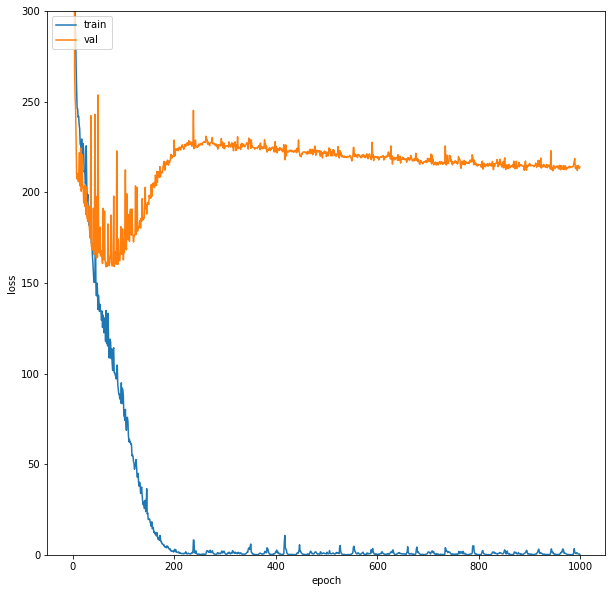

In [42]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.ylim(0.0, 300.0)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# 이 데이터에선 단순히 1인 픽셀수와 관련이 있기 때문에
# 다층 퍼셉트론 모델이 더 좋았음

In [43]:
# 모델 평가하기

score = model.evaluate(x_test, y_test, batch_size=32)
print(score)

4/4 [==============================] - 0s 2ms/step - loss: 179.4030
179.4030303955078


In [44]:
# 모델 사용하기

yhat_test = model.predict(x_test, batch_size=32)

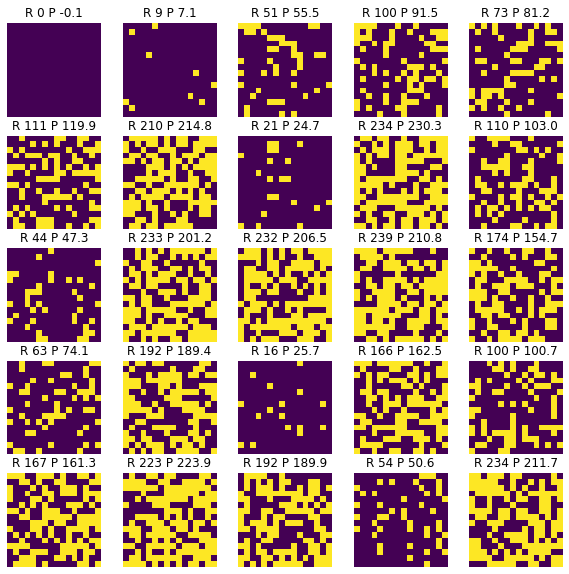

In [45]:
plt_row = 5
plt_col = 5

plt.rcParams['figure.figsize'] = (10, 10)
f, axarr = plt.subplots(plt_row, plt_col)

for i in range(plt_row*plt_col):
    sub_plt = axarr[i//plt_row, i%plt_col]
    sub_plt.axis('off')
    sub_plt.imshow(x_test[i].reshape(width, height))
    sub_plt.set_title('R %d P %.1f' %(y_test[i][0], yhat_test[i][0]))
    
plt.show()